In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_note_interactivity = "all"
%matplotlib inline


import os
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

1. 图片与子图

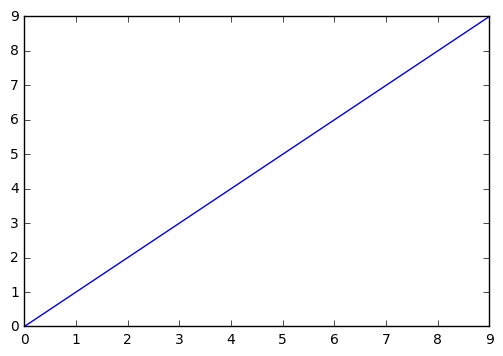

In [2]:
data = np.arange(10)
plt.plot(data)

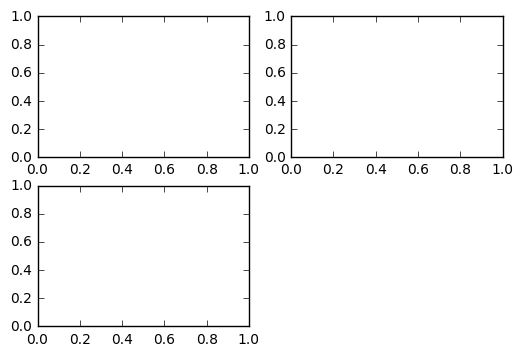

In [3]:
#生成子图，头两个参数2，2指子图以二行二列进行排列
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

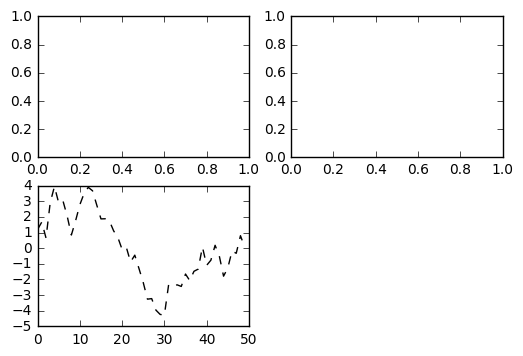

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

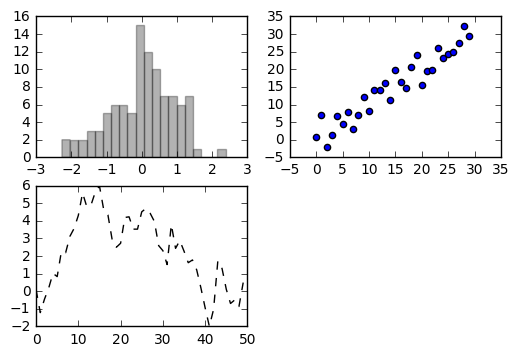

In [5]:
#fig.add_subplot返回的对象是AxesSubplot对象，因此可以调用对象的实例方法进行绘图
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA84451DD8>,
      dtype=object)

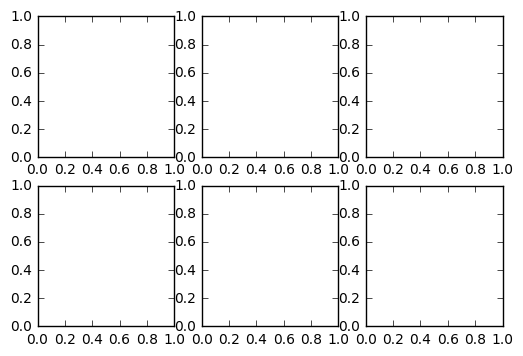

In [7]:
#用plt.subplots可以一次性创建指定排列的子图矩阵
fig, axes = plt.subplots(2, 3)
axes

数组axes可以像二维数组那样方便地进行索引，例如：axes[[0,1]]。

还可以使用sharex和sharey来表明子图分别拥有相同的x轴和y轴。

pyplot.subplots参数：

nrows

ncols

sharex

sharey

subplot_kw————传入add_subplot的关键字参数字典

**fig_kw————在生成图片是使用额外的关键字参数，例如plt.subplots(2, 2, figsize=(6, 6))

2. 调整子图周围的间隔

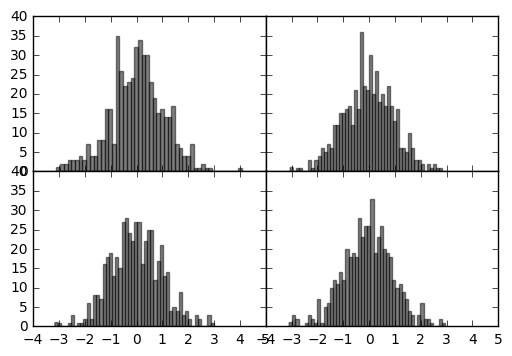

In [9]:
#subplots_ajust(left, bottom, right, top, wspace, hspace)
#wspace,hspace分别控制图片的宽度和高度百分比
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [10]:
#上面出现了刻度值重叠，可以通过显示指定刻度位置和刻度标签的方法来修复轴标签

3. 颜色、标记和线类型

In [12]:
#ax.plot(x, y, 'g--')
#ax.plot(x, y, linestyle='--', color='g')

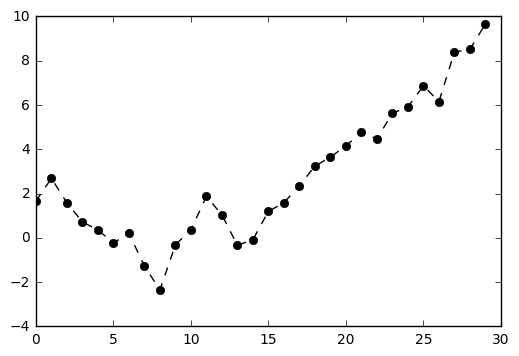

In [13]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

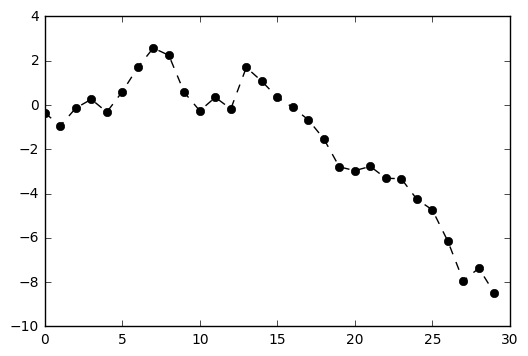

In [14]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

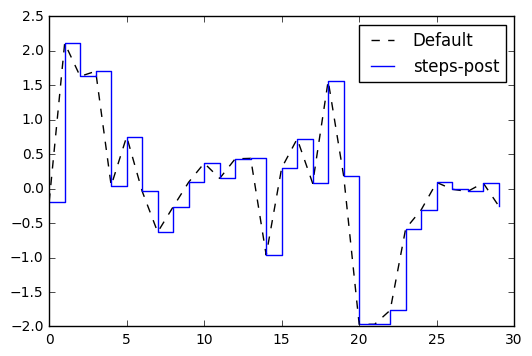

In [15]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

In [16]:
#无论用数据绘图时是否传递了label选项，用户都必须调用plt.legend来生成图例（如果有轴引用，也可以用ax.legend）

3. 刻度、标签和图例

图表修饰工作主要有两种方式：

1）程序性的pyplot接口（matplotlib.pyplot）

2）更多面向对象的原生matplotlib API

pyplot接口设计为交互式使用，包含了如xlim、xticks、xticklabels等方法。这些方法分别控制了绘图的范围、刻度位置和刻度标签。

可以通过两种方式来使用：

在没有函数参数的情况下调用，返回当前的参数值（例如plt.xlim()返回当前x轴的绘图范围）

传入参数的情况下调用，并设置参数值（例如plt.xlim([[0,10]])会将x轴的范围设置为0至10）

所有的这些方法都会在当前活动的或最近创建的AxesSubplot上生效。

下面是设置标题、周标签、刻度和刻度标签的示例：

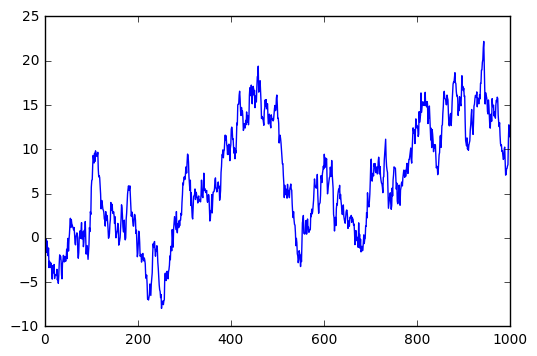

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

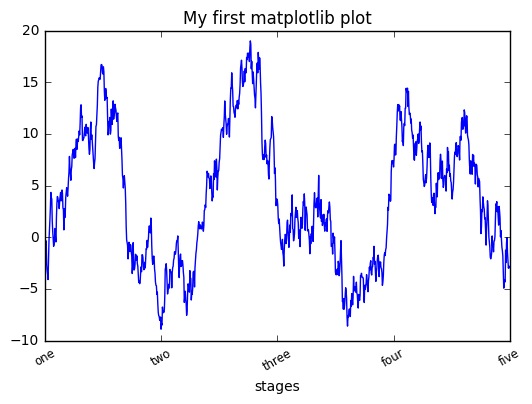

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

#改变轴的刻度函数，牢记ax.set_xticks and set_xticklabels

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('stages')

轴类型拥有一个set方法，允许批量设置绘图属性

In [27]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'stages'
}
ax.set(**props)

添加legend图例

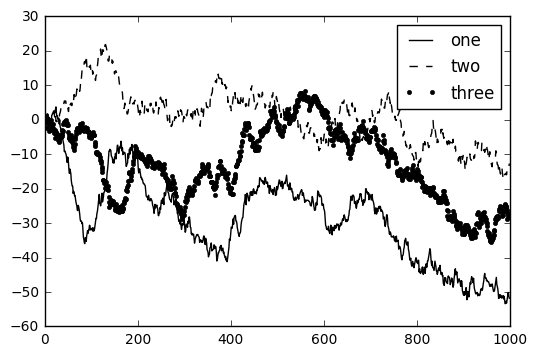

In [30]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

In [32]:
#如果需要取消图例中的元素，不要传入label参数或者传入label='_nolegend_'占位

4. 注释和子图加工

text

arrow

annote

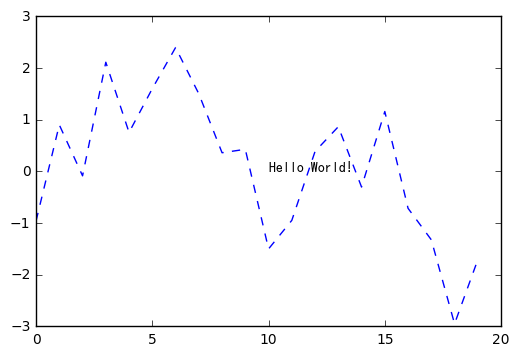

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(np.random.randn(20).cumsum(), 'b--')
ax1.text(10, 0, 'Hello World!', family='SimHei', fontsize=10)

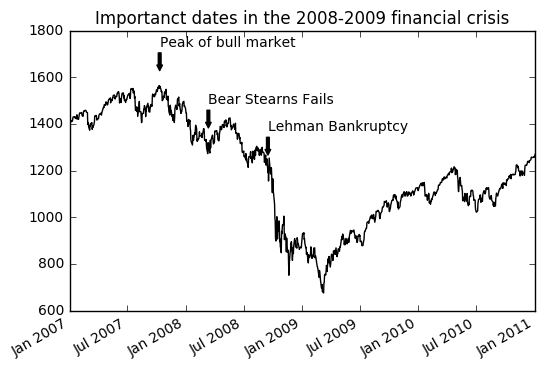

In [55]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('code/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]


for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), xytext = (date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Importanct dates in the 2008-2009 financial crisis')

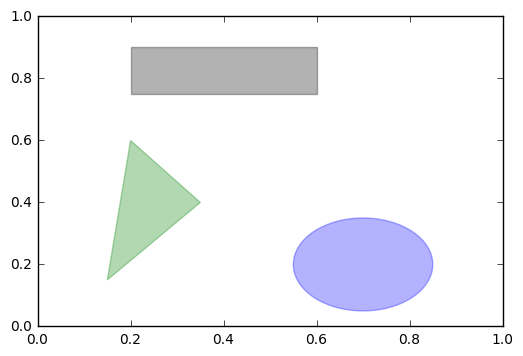

In [57]:
#添加图形
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.3)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

4. 将图像保存至文件

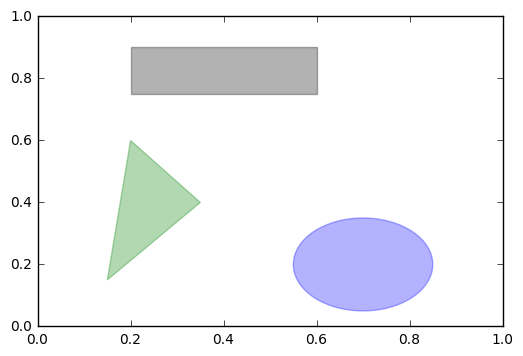

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.3)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.savefig('code/out/example.png', dpi=400, bbox_inches='tight', facecolor='w', edgecolor='w')
#'tight'去掉周围留白部分，facecolor和edgecolor设定子图之外的背景颜色

5. matplotlib的设置

大部分默认行为都可以通过广泛的全局参数来控制，包括图形大小、子图间距、颜色、字体大小和网格式样

rc方法是使用Python变成修改配置的方式之一。

rc内第一个参数是用户想要自定义的组间，例如figure、axes、xtick、ytick、grid和legend等。

In [63]:
#plt.rc('figure', figsize=(10, 10))

#利用字典来制定多个关键字参数序列

'''
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size' : 'small'}
plt.rc('font', **font_options)
'''

"\nfont_options = {'family' : 'monospace',\n                'weight' : 'bold',\n                'size' : 'small'}\nplt.rc('font', **font_options)\n"

6. 利用pandas和seaborn来进行绘图

导入seaborn会修改默认的matplotlib配色方案和绘图仰视，提高可读性和美观性

第一种——折线图

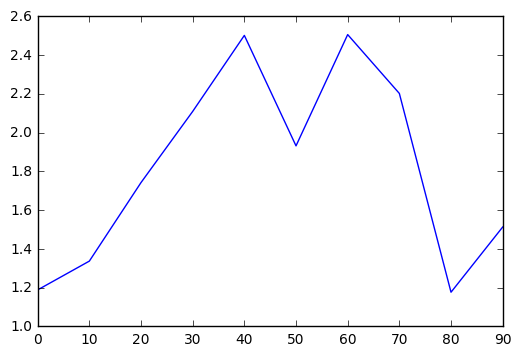

In [65]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

大部分的pandas绘图对象，接收可选的ax参数，该参数可以是一个matplotlib子图对象。从而可以更为灵活地在网格布局中放置子图。

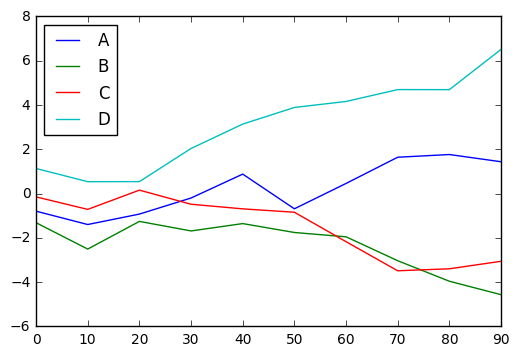

In [67]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

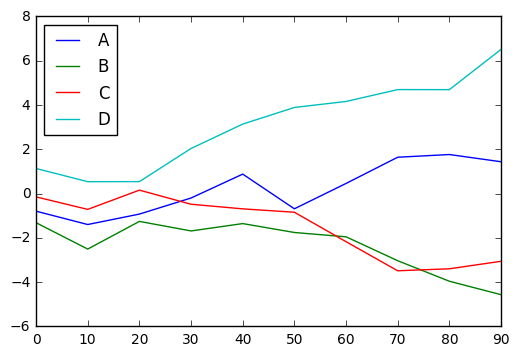

In [81]:
import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df.plot(ax=ax)


Series.plot方法参数

label————图例标签

ax————绘图所用的matplotlib子图对象；如果没有传递值，则使用当前活动的matplotlib子图

style————传给matplotlib的样式字符串，比如：'ko--'

alpha————透明度

kind————可以是area、bar、barh、density、hist、kde、line、pie不同种制图类型

use_index————使用对象索引刻度标签

rot————刻度标签旋转（0-360度）

xticks————用于x轴刻度的值

yticks————用于y轴刻度的值

xlim/ylim————x轴/y轴的范围

grid————显示轴网络，默认是打开的



DF.plot拥有以上之外的更多选项

例如，是否将各列绘制到同一张子图中，或者为各列单独生成独立的子图。

subplots————将DF的每一列绘制在独立的自途中

sharex————如果为True，则共享相同的x轴、刻度和范围

sharey————同上

figsize————用于生成图片尺寸的元组

title————标题字符串

legend————添加子图图例，默认为True

sort_columns————按照字母顺序绘制各列，默认使用的是现有的列排序

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA887DCBE0>,
      dtype=object)

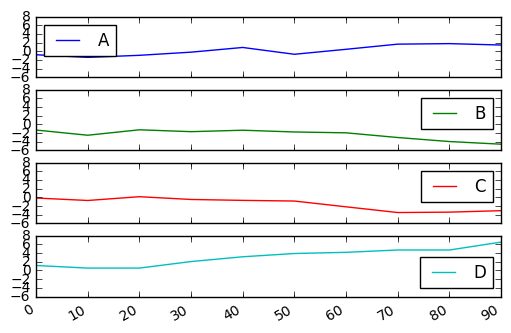

In [83]:
df.plot(subplots=True,sharex=True,sharey=True)

第二种————柱状图

In [84]:
#plot.bar()和plot.barh()可以分别绘制崔志和水平的柱状图

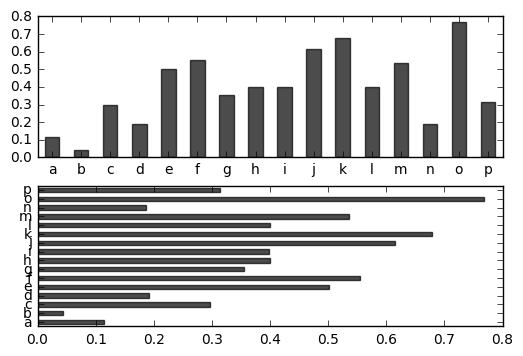

In [92]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7, rot=0)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [93]:
df = pd.DataFrame(np.random.rand(6,4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [94]:
df

Genus,A,B,C,D
one,0.591326,0.456656,0.515197,0.667266
two,0.451045,0.251079,0.203583,0.952935
three,0.458050,0.098748,0.933064,0.651856
four,0.704408,0.017965,0.756546,0.806800
five,0.236960,0.259996,0.629892,0.218076
six,0.529600,0.602156,0.187374,0.202376


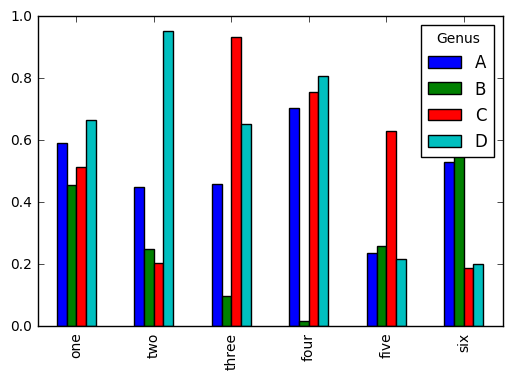

In [95]:
df.plot(kind='bar')

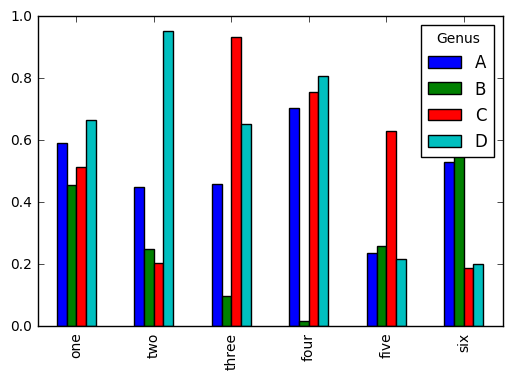

In [96]:
df.plot.bar()

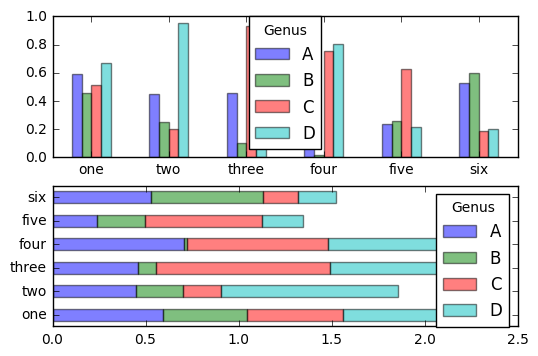

In [98]:
fig, axes = plt.subplots(2, 1)
df.plot.bar(ax=axes[0], alpha=0.5, rot=0)
df.plot.barh(ax=axes[1], stacked=True, alpha=0.5)

*使用value_counts:s.value_counts().plot.bar()可以有效地对Series值的陪你率进行可视化。非常常用*

In [109]:
tips = pd.read_csv('code/examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [110]:
party_counts = party_counts.loc[:, 2:5]

In [111]:
#标准化至和为1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


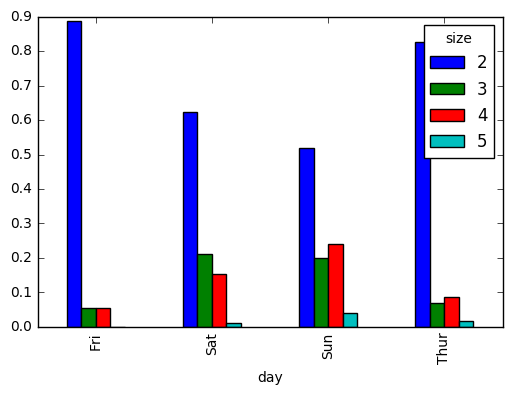

In [112]:
party_pcts.plot.bar()

In [113]:
#对于在绘图前需要聚合或汇总的数据，使用seaborn包会使工作变得更为简单。

In [118]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])#计算了小费的百分率
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


C:\Program Files\Python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


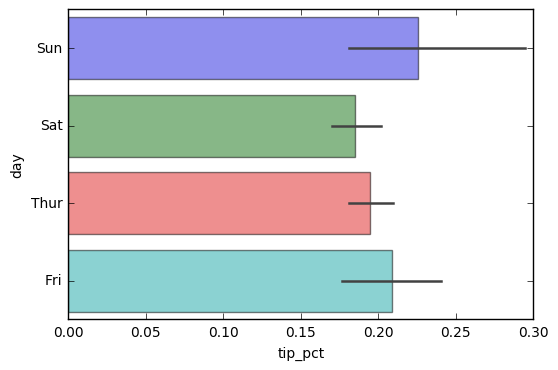

In [119]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', alpha=0.5)
#可见在周日人们普遍愿意给更多小费

C:\Program Files\Python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


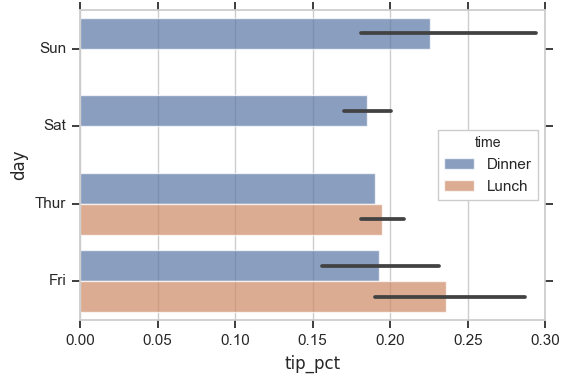

In [123]:
sns.set(style='whitegrid')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', alpha=0.7)

第三种————直方图与密度图

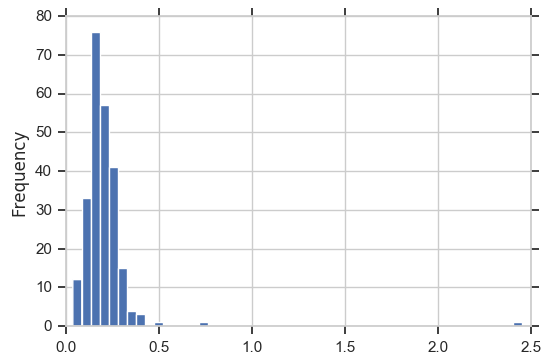

In [124]:
#直方图
tips['tip_pct'].plot.hist(bins=50)

In [125]:
#密度图
#密度图是一种与直方图相关的图表类型，他通过计算可能产生观测数据的连续概率分布估计而产生。
#通常的做法是加你个这种分布近似为"内核"的混合，也就是像正态分布那样简单的分布。
#因此，密度图也被称作核密度图（KDE）

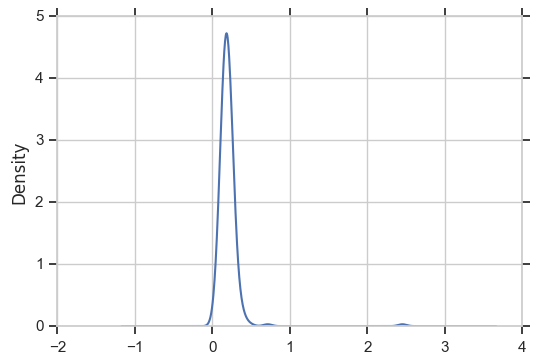

In [126]:
tips['tip_pct'].plot.density()

In [127]:
#distplot可以绘制直方图和连续密度估计

C:\Program Files\Python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


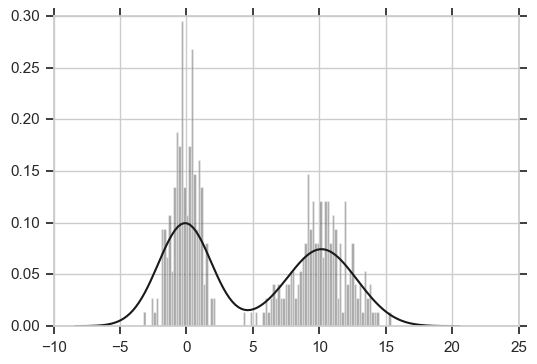

In [128]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

4. 散点图或点图

In [136]:
macro = pd.read_csv('code/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


C:\Program Files\Python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


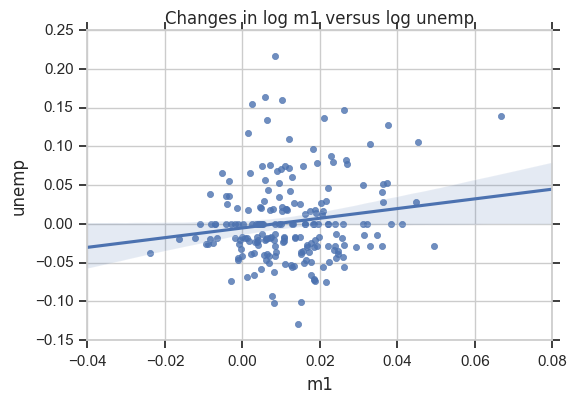

In [137]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' %('m1', 'unemp'))

C:\Program Files\Python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


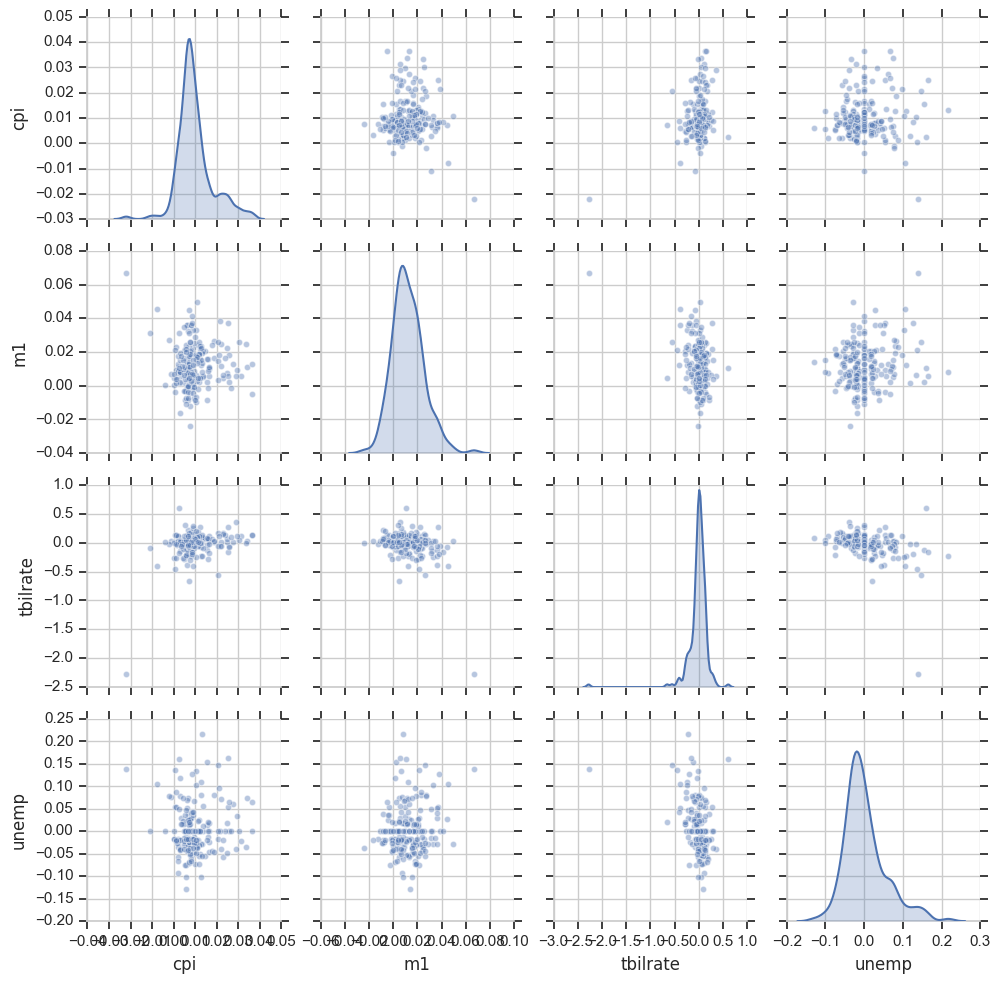

In [140]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.4})

分面网格和分类数据

C:\Program Files\Python35\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Program Files\Python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


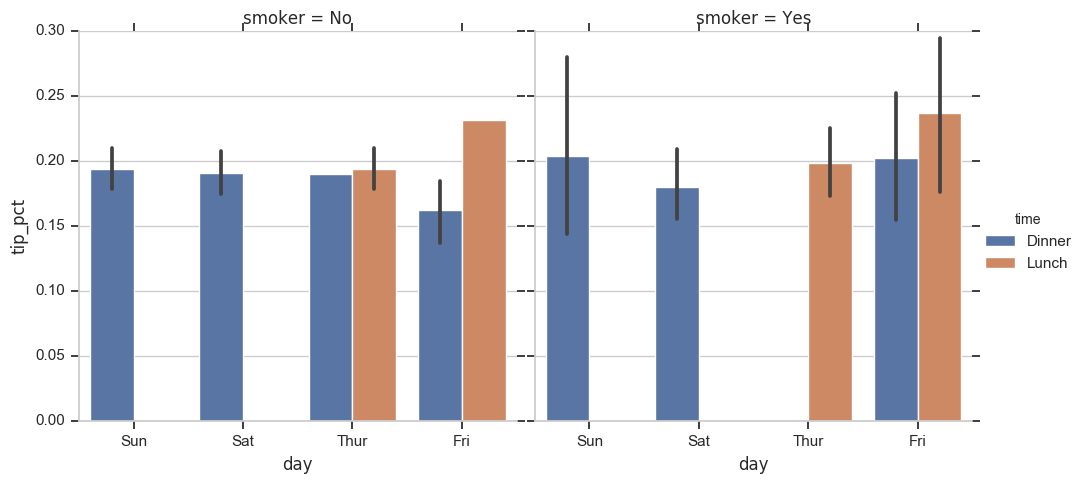

In [141]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

C:\Program Files\Python35\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Program Files\Python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


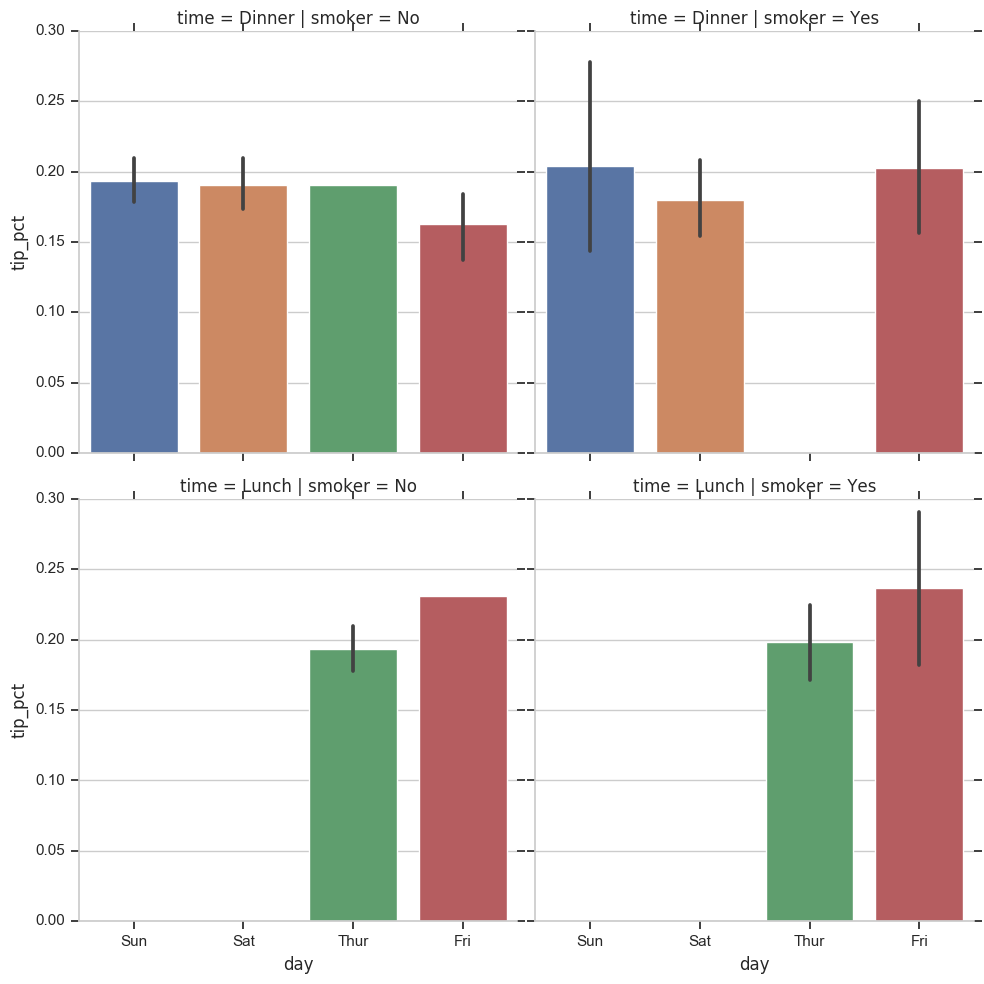

In [143]:
sns.factorplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips[tips.tip_pct < 1])

C:\Program Files\Python35\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


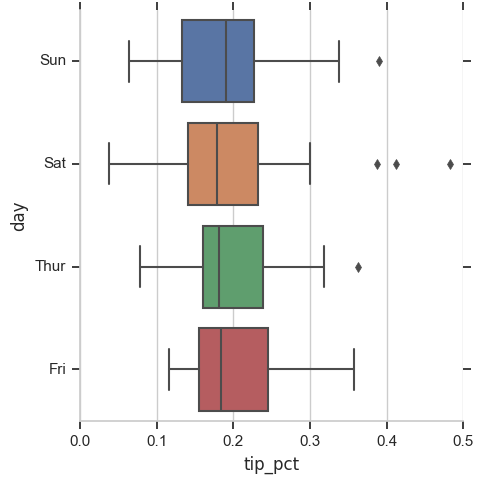

In [145]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])